# PIK3CA: Effects of Mutation on RPS6KB1

<b> Standard imports for playing with and plotting data frames. </b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

<b> Import CPTAC data </b>

In [2]:
import CPTAC.Endometrial as CPTAC

Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and AKT1 proteome abundance 

### Perform a t-test with mutated and non-mutated protein levels

In [4]:
protList = ['RPS6KB1']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

proteomics = proteomics[:100]

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 
        else:
            print("Unsignificant result for ", protein, " ", ttest)

Test for RPS6KB1: 
Ttest_indResult(statistic=-2.0698564525054906, pvalue=0.041179988266457065)


 ### We can now plot the data 

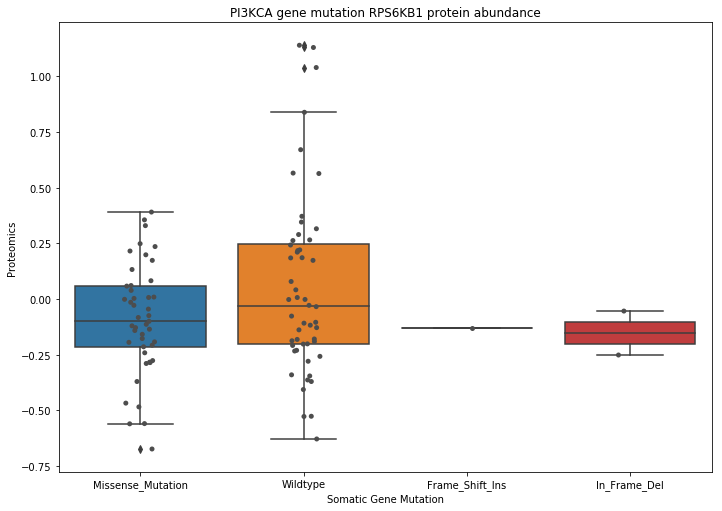

In [5]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='RPS6KB1', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation RPS6KB1 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='RPS6KB1',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PI3KCA mutation and RPS6KB1 phosphoproteome abundance 

In [6]:
sites = phos.columns
p_values = []
site_names = []
protein = 'RPS6KB1'


pattern = re.compile(protein)
isInList = filter(pattern.search, sites)
if next(isInList, None) is not None:
    phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
    phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
    pcutoff = 0.05/len(phosphositesdf.columns)
    for site in phosphositesdf.columns:
        if (site is not 'Mutation'):
            sitedf = CPTAC.compare_mutations(phos, site, gene)
            mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
            wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
            #print(wtdf[site])
            ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
            if ttest[1] < pcutoff:
                print("Test for ", site, ttest)
            else:
                print("Unsignificant result for ", site, ttest)
                
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))

#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

Unsignificant result for  RPS6KB1-S441 Ttest_indResult(statistic=1.6514071179688938, pvalue=0.10138366694309682)
Unsignificant result for  RPS6KB1-S447 Ttest_indResult(statistic=0.8320945773915001, pvalue=0.4067527270380389)
Unsignificant result for  RPS6KB1-S452 Ttest_indResult(statistic=-1.7263191406014768, pvalue=0.1035442672683791)
Unsignificant result for  RPS6KB1-T444 Ttest_indResult(statistic=1.8183861238465568, pvalue=0.07125526837910805)


<b> Activation of AKT1 leads to the phosphorylation of RPS6KB1 (https://www.uniprot.org/uniprot/P31749). These results are in harmony with the findings on AKT1 phosphorylation levels when PIK3CA is mutated. </b>

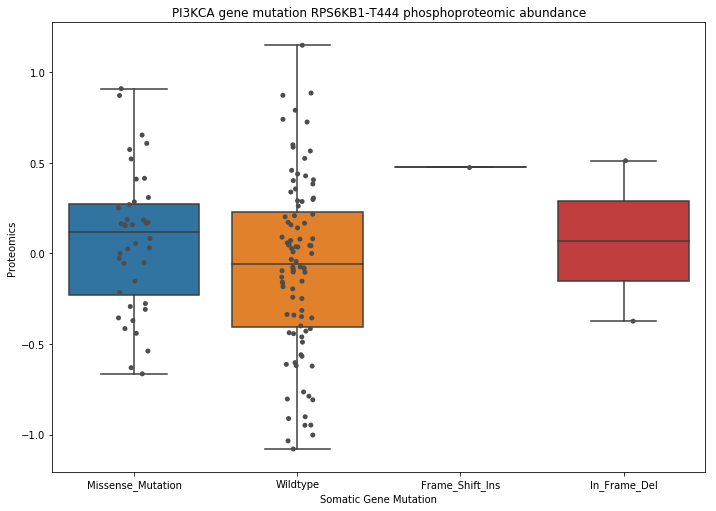

In [7]:
site = 'RPS6KB1-T444'
sitedf = CPTAC.compare_mutations(phos, protein, gene)


a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=sitedf, x="Mutation",y=site, ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation "+ site+ " phosphoproteomic abundance")
somatic_boxplot = sns.stripplot(data=sitedf, x="Mutation", y=site,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()